In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
from pandas import concat
from pytrends.request import TrendReq
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series


# !pip install pyramid-arima   
# !pip install pytrends
# !pip install sktime
data_monthly = pd.read_csv('salesmonthly.csv')
data_monthly.head()

,Unnamed: 0,Acnemoist Cream 60GM,Aknay Bar 100GM,Androanagen Solution 100Ml,Androanagen Tablets 10S,Banatan Cream 50GM,Canthex 10 Capsules,Es Body Wash 200ML,Melawash 100 ML,Nixiyax 15 'S,Triobloc Cream 25GM,Zinikam Cream 200 G,datum
0,0,53.0,1.0,12.0,74.0,27.0,39.0,1.0,3.0,0.0,13.0,14.0,2020-01-31
1,1,150.0,3.0,16.0,90.0,15.0,107.0,2.0,23.0,73.0,30.0,4.0,2020-02-29
2,2,653.0,82.0,164.0,1062.0,255.0,508.0,26.0,169.0,250.0,98.0,7.0,2020-03-31
3,3,1144.0,205.0,247.0,2030.0,357.0,986.0,92.0,470.0,383.0,331.0,38.0,2020-04-30
4,4,380.0,126.0,46.0,570.0,104.0,344.0,26.0,157.0,46.0,70.0,29.0,2020-05-31


In [5]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily.head()

,datum,Acnemoist Cream 60GM,Aknay Bar 100GM,Androanagen Solution 100Ml,Androanagen Tablets 10S,Banatan Cream 50GM,Canthex 10 Capsules,Es Body Wash 200ML,Melawash 100 ML,Nixiyax 15 'S,Triobloc Cream 25GM,Zinikam Cream 200 G,Month,Year,Weekday Name,Hour,Hours
0,2020-01-01,7.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,2020,Wednesday,0,276
1,2020-01-02,7.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1,2020,Thursday,0,276
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,Friday,0,276
3,2020-01-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,Saturday,0,276
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,Sunday,0,276


In [6]:
data_weekly = pd.read_csv('salesweekly.csv')
data_weekly.head()

,datum,Acnemoist Cream 60GM,Aknay Bar 100GM,Androanagen Solution 100Ml,Androanagen Tablets 10S,Banatan Cream 50GM,Canthex 10 Capsules,Es Body Wash 200ML,Melawash 100 ML,Nixiyax 15 'S,Triobloc Cream 25GM,Zinikam Cream 200 G
0,2020-01-06,25.0,0.0,1.0,12.0,0.0,21.0,0.0,0.0,0.0,0.0,4.0
1,2020-01-13,13.0,1.0,11.0,22.0,14.0,0.0,0.0,0.0,0.0,6.0,10.0
2,2020-01-20,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0,1.0,0.0
3,2020-01-27,0.0,0.0,0.0,28.0,12.0,12.0,0.0,1.0,0.0,6.0,0.0
4,2020-02-03,42.0,0.0,0.0,45.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0


In [7]:
cols = ['Acnemoist Cream 60GM','Aknay Bar 100GM','Androanagen Solution 100Ml','Androanagen Tablets 10S', 'Banatan Cream 50GM','Canthex 10 Capsules','Es Body Wash 200ML','Melawash 100 ML',"Nixiyax 15 'S",'Triobloc Cream 25GM','Zinikam Cream 200 G']


for x in cols:
        print("*************** " + x + " DATA_DAILY STATS *****************" )
        print(data_daily[x].describe())
        
for x in cols:
        print("*************** " + x + " DATA_WEEKLY STATS *****************" )
        print(data_weekly[x].describe())
        
for x in cols:
        print("*************** " + x + " DATA_MONTHLY STATS *****************" )
        print(data_monthly[x].describe())

*************** Acnemoist Cream 60GM DATA_DAILY STATS *****************
count    1461.000000
mean       23.852156
std        31.871511
min         0.000000
25%         0.000000
50%        12.000000
75%        34.000000
max       251.000000
Name: Acnemoist Cream 60GM, dtype: float64
*************** Aknay Bar 100GM DATA_DAILY STATS *****************
count    1461.000000
mean        4.945927
std        11.433510
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       111.000000
Name: Aknay Bar 100GM, dtype: float64
*************** Androanagen Solution 100Ml DATA_DAILY STATS *****************
count    1461.000000
mean        8.136893
std        17.681478
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max       197.000000
Name: Androanagen Solution 100Ml, dtype: float64
*************** Androanagen Tablets 10S DATA_DAILY STATS *****************
count    1461.000000
mean       35.668036
std        50.941479
min        

In [14]:
def scatter_plot(vals, color):
    dictionary  = dict(zip(cols, vals))
    data = list(dictionary.items())
    arr = np.array(data)
    vals = floatArray = np.asarray( arr[:,1], dtype = float)
    plt.scatter(arr[:,0], vals, c=color)
    plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
    
    
def bar_chart(vals, color):
    dictionary  = dict(zip(cols, vals))
    data = list(dictionary.items())
    arr = np.array(data)
    vals = floatArray = np.asarray( arr[:,1], dtype = float)
    plt.bar(arr[:,0], vals, color = color)
    plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically

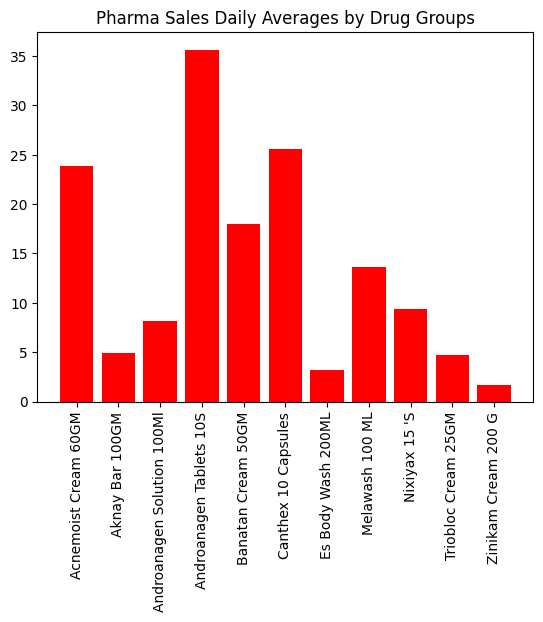

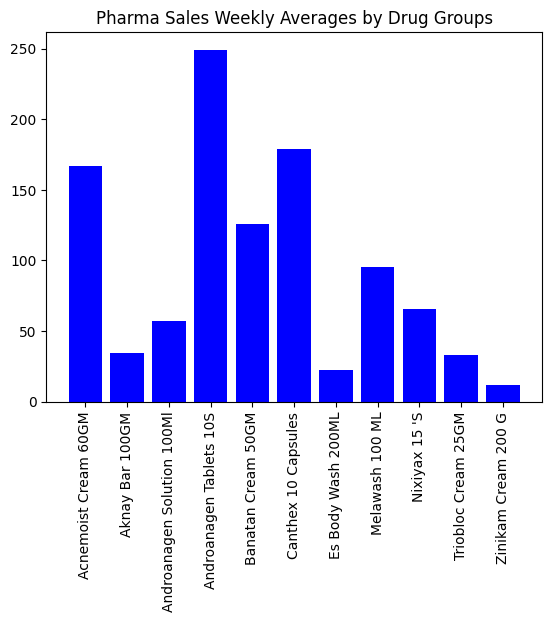

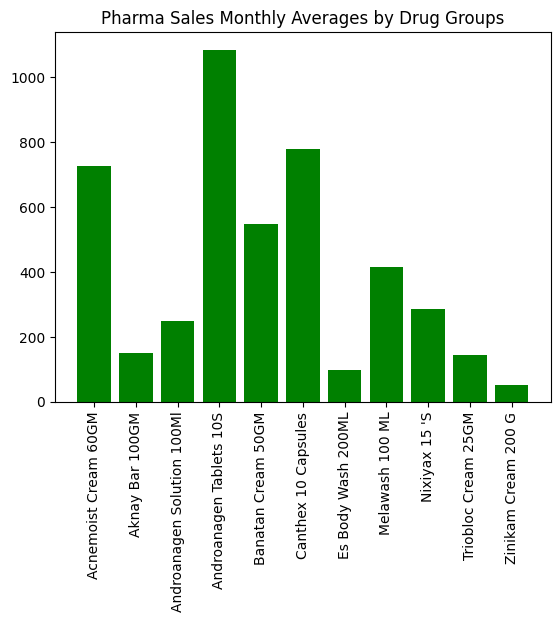

In [15]:

daily_mean_arr = np.array([])
for x in cols:
        mean_daily = np.average(data_daily[x])
        daily_mean_arr = np.concatenate((daily_mean_arr,[mean_daily]))
        
        
weekly_mean_arr = np.array([])
for x in cols:
        mean_weekly = np.average(data_weekly[x])
        weekly_mean_arr = np.concatenate((weekly_mean_arr,[mean_weekly]))
        
monthly_mean_arr = np.array([])
for x in cols:
        mean_monthly = np.average(data_monthly[x])
        monthly_mean_arr = np.concatenate((monthly_mean_arr,[mean_monthly]))


bar_chart(daily_mean_arr, 'red')
plt.title('Pharma Sales Daily Averages by Drug Groups')
plt.show()
    

bar_chart(weekly_mean_arr, 'blue')
plt.title('Pharma Sales Weekly Averages by Drug Groups')
plt.show()
    
bar_chart(monthly_mean_arr, 'green')
plt.title('Pharma Sales Monthly Averages by Drug Groups')
plt.show()
    



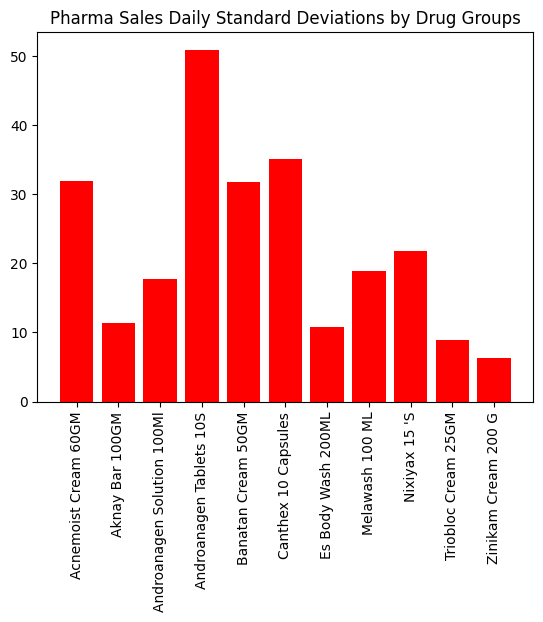

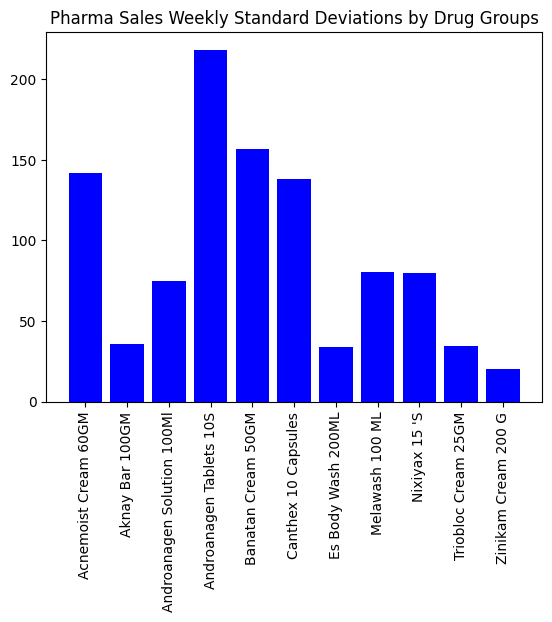

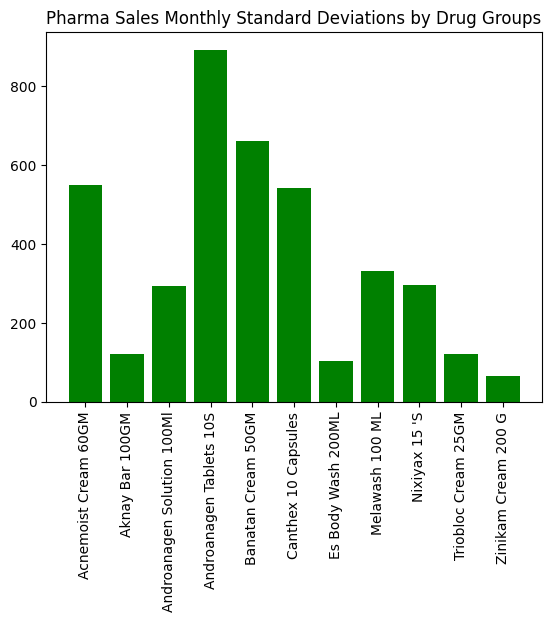

In [16]:

daily_std_arr = np.array([])
for x in cols:
        std_daily = np.std(data_daily[x])
        daily_std_arr = np.concatenate((daily_std_arr,[std_daily]))
        
        
weekly_std_arr = np.array([])
for x in cols:
        std_weekly = np.std(data_weekly[x])
        weekly_std_arr = np.concatenate((weekly_std_arr,[std_weekly]))
        
monthly_std_arr = np.array([])
for x in cols:
        std_monthly = np.std(data_monthly[x])
        monthly_std_arr = np.concatenate((monthly_std_arr,[std_monthly]))

bar_chart(daily_std_arr, 'red')
plt.title('Pharma Sales Daily Standard Deviations by Drug Groups')
plt.show()
    

bar_chart(weekly_std_arr, 'blue')
plt.title('Pharma Sales Weekly Standard Deviations by Drug Groups')
plt.show()
    
bar_chart(monthly_std_arr, 'green')
plt.title('Pharma Sales Monthly Standard Deviations by Drug Groups')
plt.show()

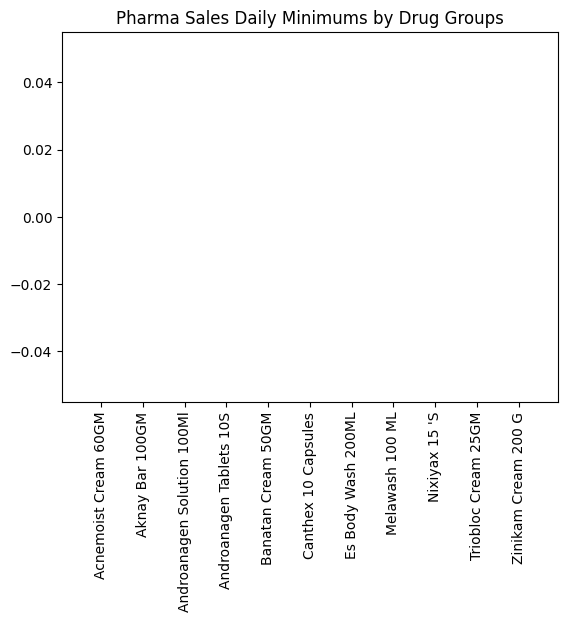

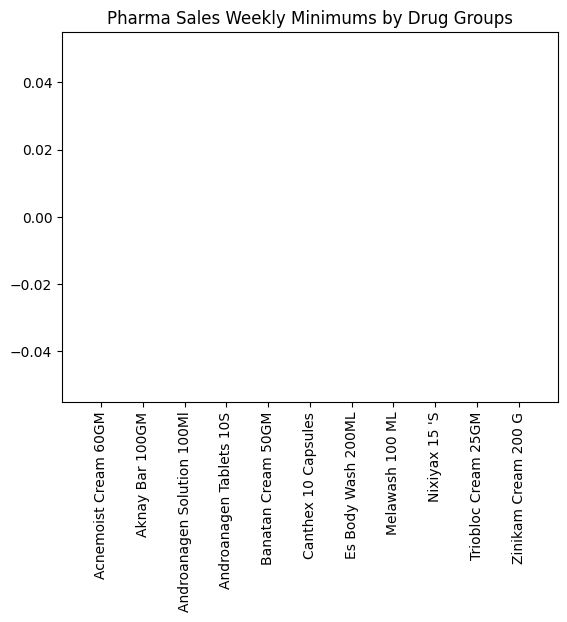

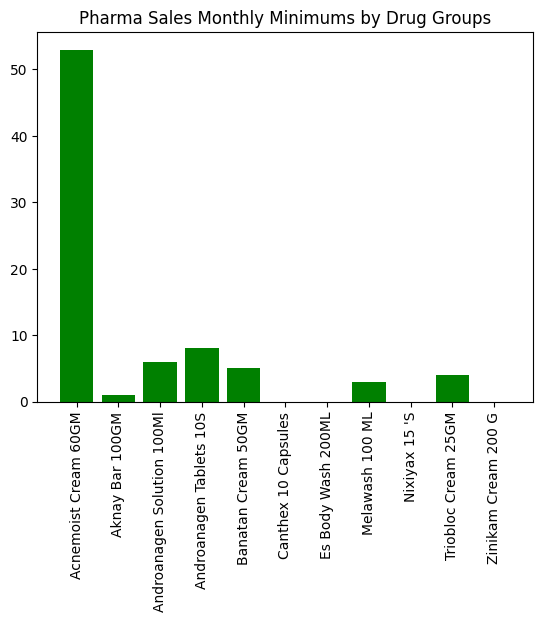

In [17]:
daily_min_arr = np.array([])
for x in cols:
        min_daily = np.min(data_daily[x])
        daily_min_arr = np.concatenate((daily_min_arr,[min_daily]))
        
        
weekly_min_arr = np.array([])
for x in cols:
        min_weekly = np.min(data_weekly[x])
        weekly_min_arr = np.concatenate((weekly_min_arr,[min_weekly]))
        
monthly_min_arr = np.array([])
for x in cols:
        min_monthly = np.min(data_monthly[x])
        monthly_min_arr = np.concatenate((monthly_min_arr,[min_monthly]))


bar_chart(daily_min_arr, 'red')
plt.title('Pharma Sales Daily Minimums by Drug Groups')
plt.show()
    

bar_chart(weekly_min_arr, 'blue')
plt.title('Pharma Sales Weekly Minimums by Drug Groups')
plt.show()
    
bar_chart(monthly_min_arr, 'green')
plt.title('Pharma Sales Monthly Minimums by Drug Groups')
plt.show()

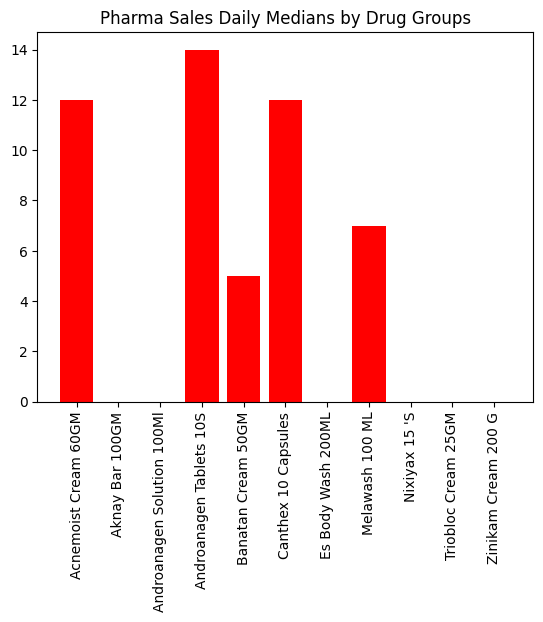

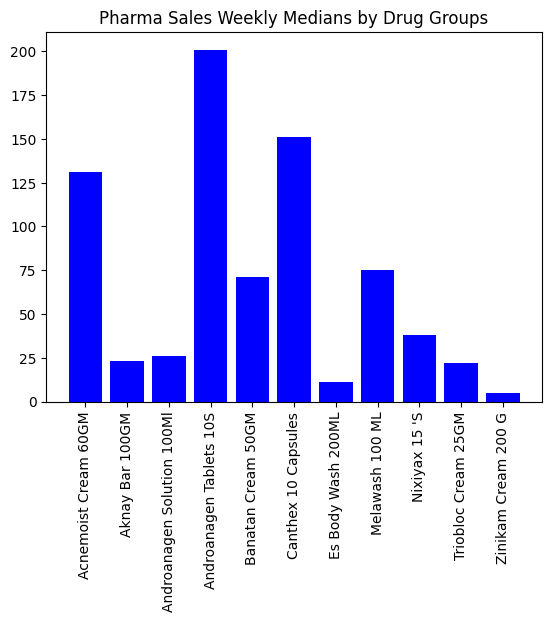

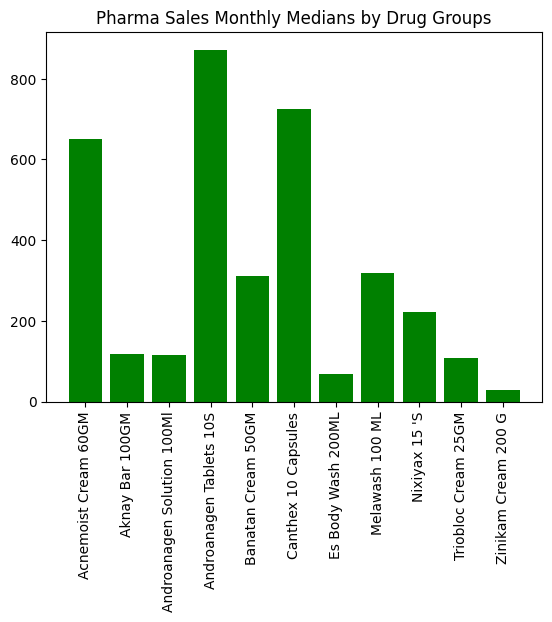

In [18]:
daily_med_arr = np.array([])
for x in cols:
        med_daily = np.median(data_daily[x])
        daily_med_arr = np.concatenate((daily_med_arr,[med_daily]))
        
        
weekly_med_arr = np.array([])
for x in cols:
        med_weekly = np.median(data_weekly[x])
        weekly_med_arr = np.concatenate((weekly_med_arr,[med_weekly]))
        
monthly_med_arr = np.array([])
for x in cols:
        med_monthly = np.median(data_monthly[x])
        monthly_med_arr = np.concatenate((monthly_med_arr,[med_monthly]))


bar_chart(daily_med_arr, 'red')
plt.title('Pharma Sales Daily Medians by Drug Groups')
plt.show()
    

bar_chart(weekly_med_arr, 'blue')
plt.title('Pharma Sales Weekly Medians by Drug Groups')
plt.show()
    
bar_chart(monthly_med_arr, 'green')
plt.title('Pharma Sales Monthly Medians by Drug Groups')
plt.show()

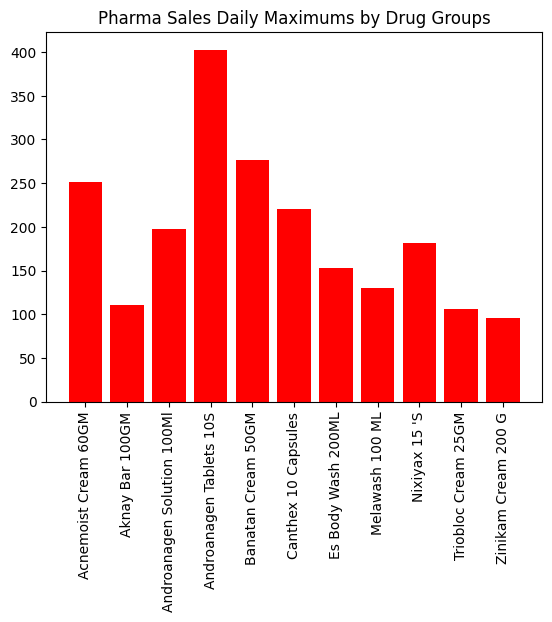

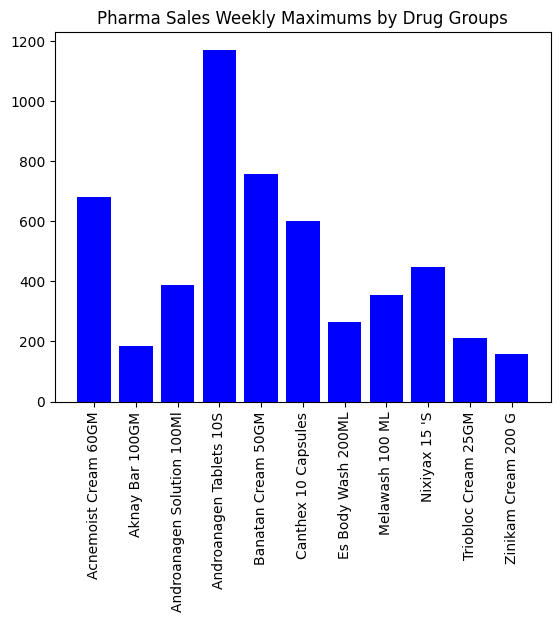

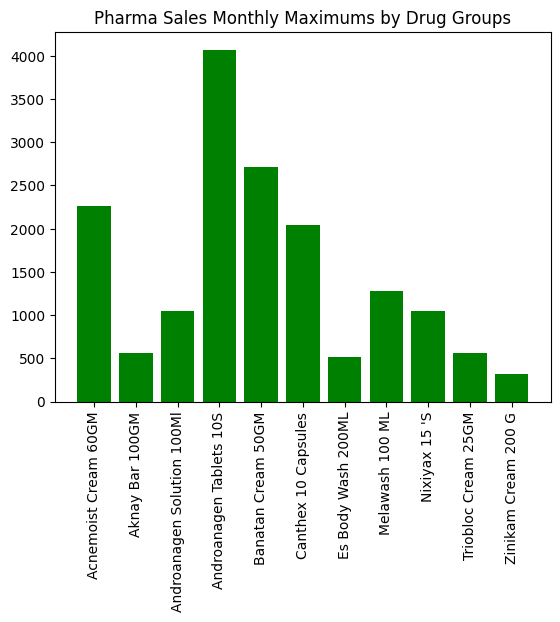

In [19]:
daily_max_arr = np.array([])
for x in cols:
        max_daily = np.max(data_daily[x])
        daily_max_arr = np.concatenate((daily_max_arr,[max_daily]))
        
        
weekly_max_arr = np.array([])
for x in cols:
        max_weekly = np.max(data_weekly[x])
        weekly_max_arr = np.concatenate((weekly_max_arr,[max_weekly]))
        
monthly_max_arr = np.array([])
for x in cols:
        max_monthly = np.max(data_monthly[x])
        monthly_max_arr = np.concatenate((monthly_max_arr,[max_monthly]))



bar_chart(daily_max_arr, 'red')
plt.title('Pharma Sales Daily Maximums by Drug Groups')
plt.show()
    

bar_chart(weekly_max_arr, 'blue')
plt.title('Pharma Sales Weekly Maximums by Drug Groups')
plt.show()
    
bar_chart(monthly_max_arr, 'green')
plt.title('Pharma Sales Monthly Maximums by Drug Groups')
plt.show()

In [23]:
data_daily.head()

,datum,Acnemoist Cream 60GM,Aknay Bar 100GM,Androanagen Solution 100Ml,Androanagen Tablets 10S,Banatan Cream 50GM,Canthex 10 Capsules,Es Body Wash 200ML,Melawash 100 ML,Nixiyax 15 'S,Triobloc Cream 25GM,Zinikam Cream 200 G,Month,Year,Weekday Name,Hour,Hours
0,2020-01-01,7.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,2020,Wednesday,0,276
1,2020-01-02,7.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1,2020,Thursday,0,276
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,Friday,0,276
3,2020-01-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,Saturday,0,276
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,Sunday,0,276


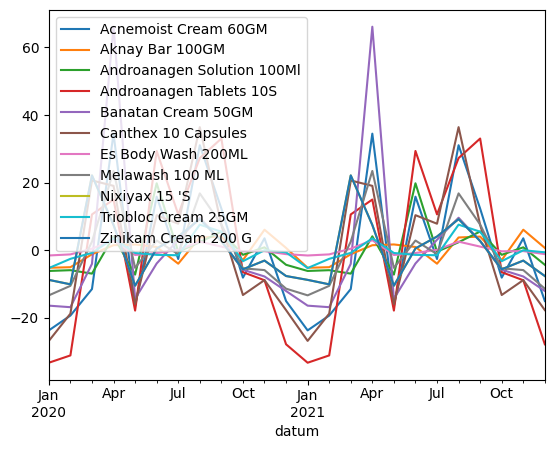

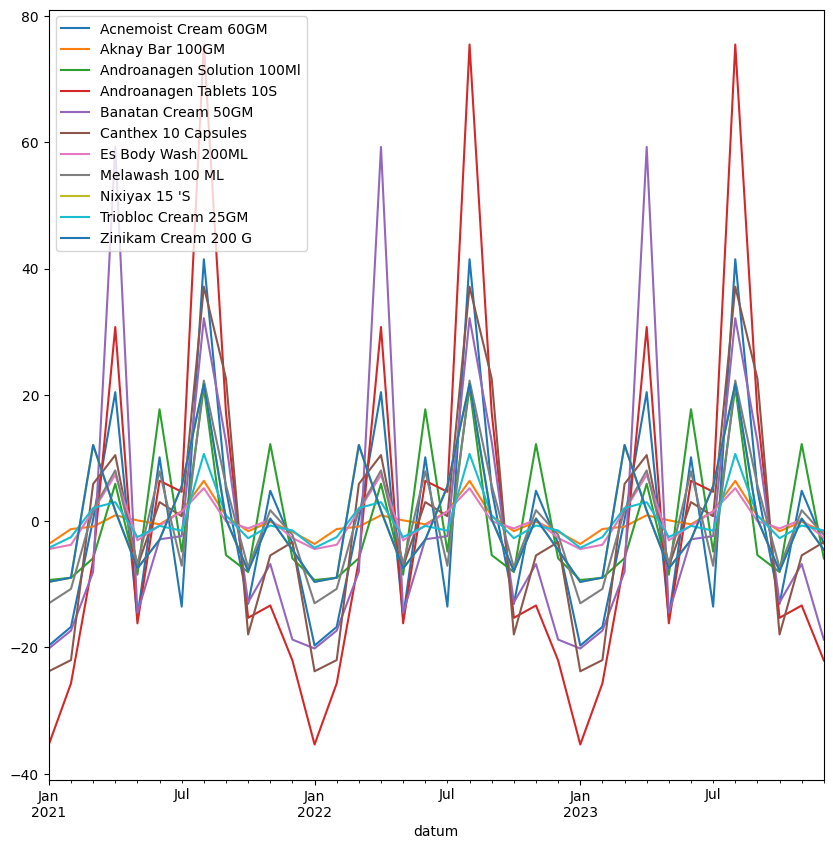

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


def show_seasonality_monthly(year_start, year_end):  
    data_daily = pd.read_csv('salesdaily.csv')
    


    data_daily['datum'] = pd.to_datetime(data_daily['datum'])
    data_daily['year'] = data_daily['datum'].dt.year
    data_daily['month'] = data_daily['datum'].dt.month
    data_daily['day'] = data_daily['datum'].dt.day



    data_daily = data_daily.set_index('datum').asfreq('D')
    data_daily.sort_values(by='datum', ascending=False)


    
    data_daily['Acnemoist_Cream_60GM_mean'] = data_daily.groupby(['year', 'month'])['Acnemoist Cream 60GM'].transform('mean')
    data_daily['Aknay_Bar_100GM_mean'] = data_daily.groupby(['year', 'month'])['Aknay Bar 100GM'].transform('mean')
    data_daily['Androanagen_Solution_100Ml'] = data_daily.groupby(['year', 'month'])['Androanagen Solution 100Ml'].transform('mean')
    data_daily['Androanagen_Tablets_10S_mean'] = data_daily.groupby(['year', 'month'])['Androanagen Tablets 10S'].transform('mean')
    data_daily['Banatan_Cream_50GM_mean'] = data_daily.groupby(['year', 'month'])['Banatan Cream 50GM'].transform('mean')
    data_daily['Canthex_10_Capsules_mean'] = data_daily.groupby(['year', 'month'])['Canthex 10 Capsules'].transform('mean')
    data_daily['Es_Body_Wash_200ML_mean'] = data_daily.groupby(['year', 'month'])['Es Body Wash 200ML'].transform('mean')
    data_daily['Melawash_100_ML_mean'] = data_daily.groupby(['year', 'month'])['Melawash 100 ML'].transform('mean')
    data_daily['Nixiyax_15_S_mean'] = data_daily.groupby(['year', 'month'])["Nixiyax 15 'S"].transform('mean')
    data_daily['Triobloc_Cream_25GM_mean'] = data_daily.groupby(['year', 'month'])['Triobloc Cream 25GM'].transform('mean')
    data_daily['Zinikam_Cream_200_G_mean'] = data_daily.groupby(['year', 'month'])['Zinikam Cream 200 G'].transform('mean')

    
    data_daily = data_daily[(data_daily.year <= year_end) ]
    data_daily = data_daily[(data_daily.year >= year_start) ]
    data_daily = data_daily[(data_daily.day == 1) ]
    # print(data_daily)
    
    Acnemoist_Cream_60GM_mean = seasonal_decompose(data_daily['Acnemoist_Cream_60GM_mean'],  model='additive', filt=None)
    data_daily["Acnemoist_Cream_60GM_mean_seasonality"]=np.array(Acnemoist_Cream_60GM_mean.seasonal)
    Acnemoist_Cream_60GM_mean.seasonal.plot()

    

    Aknay_Bar_100GM_mean = seasonal_decompose(data_daily['Aknay_Bar_100GM_mean'],  model='additive', filt=None)
    data_daily["Aknay_Bar_100GM_mean_seasonality"]=np.array(Aknay_Bar_100GM_mean.seasonal)
    Aknay_Bar_100GM_mean.seasonal.plot()


    Androanagen_Solution_100Ml = seasonal_decompose(data_daily['Androanagen_Solution_100Ml'],  model='additive', filt=None)
    data_daily["Androanagen_Solution_100Ml_seasonality"]=np.array(Androanagen_Solution_100Ml.seasonal)
    Androanagen_Solution_100Ml.seasonal.plot()
    
    Androanagen_Tablets_10S_mean = seasonal_decompose(data_daily['Androanagen_Tablets_10S_mean'],  model='additive', filt=None)
    data_daily["Androanagen_Tablets_10S_mean_seasonality"]=np.array(Androanagen_Tablets_10S_mean.seasonal)
    Androanagen_Tablets_10S_mean.seasonal.plot()

    Banatan_Cream_50GM_mean = seasonal_decompose(data_daily['Banatan_Cream_50GM_mean'],  model='additive', filt=None)
    data_daily["Banatan_Cream_50GM_mean_seasonality"]=np.array(Banatan_Cream_50GM_mean.seasonal)
    Banatan_Cream_50GM_mean.seasonal.plot()


    
    Canthex_10_Capsules_mean = seasonal_decompose(data_daily['Canthex_10_Capsules_mean'],  model='additive', filt=None)
    data_daily["Canthex_10_Capsules_mean_seasonality"]=np.array(Canthex_10_Capsules_mean.seasonal)
    Canthex_10_Capsules_mean.seasonal.plot()
    

    
    Es_Body_Wash_200ML_mean = seasonal_decompose(data_daily['Es_Body_Wash_200ML_mean'],  model='additive', filt=None)
    data_daily["Es_Body_Wash_200ML_mean_seasonality"]=np.array(Es_Body_Wash_200ML_mean.seasonal)
    Es_Body_Wash_200ML_mean.seasonal.plot()
    

    Melawash_100_ML_mean = seasonal_decompose(data_daily['Melawash_100_ML_mean'],  model='additive', filt=None)
    data_daily["Melawash_100_ML_mean_seasonality"]=np.array(Melawash_100_ML_mean.seasonal)
    Melawash_100_ML_mean.seasonal.plot()
    

    Nixiyax_15_S_mean = seasonal_decompose(data_daily['Nixiyax_15_S_mean'],  model='additive', filt=None)
    data_daily["Nixiyax_15_S_mean_seasonality"]=np.array(Nixiyax_15_S_mean.seasonal)
    Nixiyax_15_S_mean.seasonal.plot()
    
    Triobloc_Cream_25GM_mean = seasonal_decompose(data_daily['Triobloc_Cream_25GM_mean'],  model='additive', filt=None)
    data_daily["Triobloc_Cream_25GM_mean_seasonality"]=np.array(Triobloc_Cream_25GM_mean.seasonal)
    Triobloc_Cream_25GM_mean.seasonal.plot()

    Zinikam_Cream_200_G_mean = seasonal_decompose(data_daily['Nixiyax_15_S_mean'],  model='additive', filt=None)
    data_daily["Zinikam_Cream_200_G_mean_seasonality"]=np.array(Zinikam_Cream_200_G_mean.seasonal)
    Zinikam_Cream_200_G_mean.seasonal.plot()

    plt.rcParams["figure.figsize"] = (10,10)
    plt.legend(['Acnemoist Cream 60GM','Aknay Bar 100GM','Androanagen Solution 100Ml','Androanagen Tablets 10S', 'Banatan Cream 50GM','Canthex 10 Capsules','Es Body Wash 200ML','Melawash 100 ML',"Nixiyax 15 'S",'Triobloc Cream 25GM','Zinikam Cream 200 G'], loc='upper left')

    plt.show()
    return data_daily

    



arr = show_seasonality_monthly(2020, 2021)


arr = show_seasonality_monthly(2021, 2023)



In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



def create_linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression().fit(X_train, y_train)
    print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
    print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))
    return lr


Training set score: 0.56
Test set score: 0.54


LinearRegression()

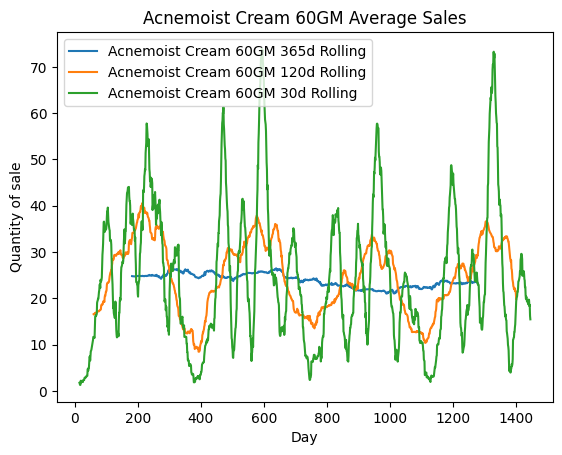

In [50]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


A365rolling = data_daily['Acnemoist Cream 60GM'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Acnemoist Cream 60GM'].rolling(120, center=True).mean()
A30rolling = data_daily['Acnemoist Cream 60GM'].rolling(30, center=True).mean()


plt.title('Acnemoist Cream 60GM Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Acnemoist Cream 60GM 365d Rolling', 'Acnemoist Cream 60GM 120d Rolling', 'Acnemoist Cream 60GM 30d Rolling'], loc='upper left')


# Apply Linear Regression for Forecasting
data_daily['Acnemoist Cream 60GM_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Acnemoist Cream 60GM_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Acnemoist Cream 60GM_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)



Training set score: 0.80
Test set score: 0.76


LinearRegression()

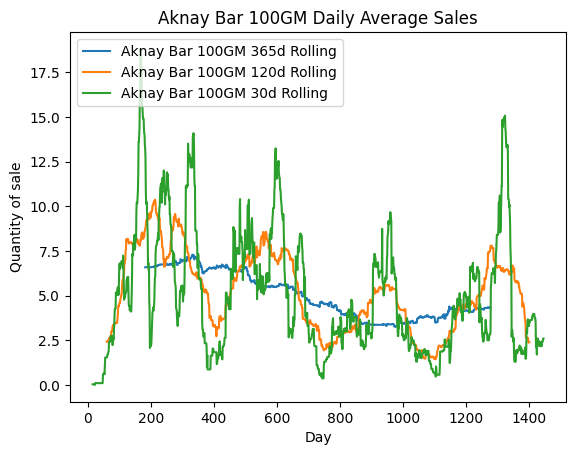

In [51]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


A365rolling = data_daily['Aknay Bar 100GM'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Aknay Bar 100GM'].rolling(120, center=True).mean()
A30rolling = data_daily['Aknay Bar 100GM'].rolling(30, center=True).mean()




plt.title('Aknay Bar 100GM Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Aknay Bar 100GM 365d Rolling', 'Aknay Bar 100GM 120d Rolling', 'Aknay Bar 100GM 30d Rolling'], loc='upper left')


# Apply Linear Regression for Forecasting
data_daily['Aknay Bar 100GM_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Aknay Bar 100GM_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Aknay Bar 100GM_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)


Training set score: 0.39
Test set score: 0.30


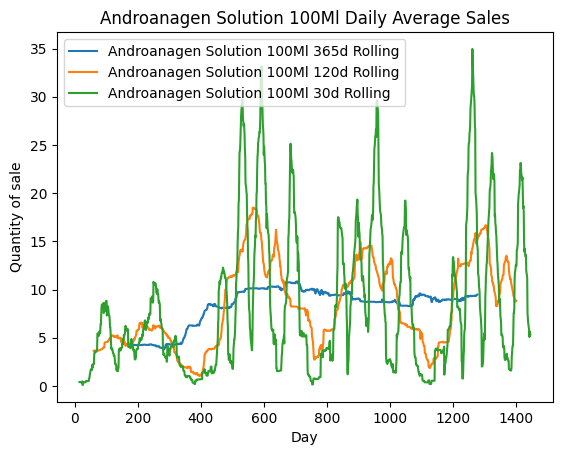

In [52]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


A365rolling = data_daily['Androanagen Solution 100Ml'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Androanagen Solution 100Ml'].rolling(120, center=True).mean()
A30rolling = data_daily['Androanagen Solution 100Ml'].rolling(30, center=True).mean()




A365rolling.plot()
A120rolling.plot()
A30rolling.plot()


plt.legend([ 'Androanagen Solution 100Ml 365d Rolling', 'Androanagen Solution 100Ml 120d Rolling', 'Androanagen Solution 100Ml 30d Rolling', 'Prediction'], loc='upper left')



plt.title('Androanagen Solution 100Ml Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')



# Apply Linear Regression for Forecasting
data_daily['Androanagen Solution 100Ml_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Androanagen Solution 100Ml_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Androanagen Solution 100Ml_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lin_regression_n02BA = create_linear_regression(X_train, X_test, y_train, y_test)




Training set score: 0.01
Test set score: 0.03


LinearRegression()

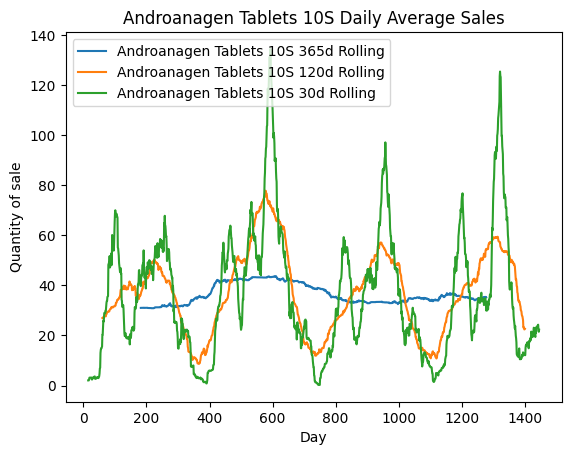

In [53]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1



A365rolling = data_daily['Androanagen Tablets 10S'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Androanagen Tablets 10S'].rolling(120, center=True).mean()
A30rolling = data_daily['Androanagen Tablets 10S'].rolling(30, center=True).mean()




plt.title('Androanagen Tablets 10S Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Androanagen Tablets 10S 365d Rolling', 'Androanagen Tablets 10S 120d Rolling', 'Androanagen Tablets 10S 30d Rolling'], loc='upper left')



# Apply Linear Regression for Forecasting
data_daily['Androanagen Tablets 10S_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Androanagen Tablets 10S_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Androanagen Tablets 10S_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.13
Test set score: 0.06


LinearRegression()

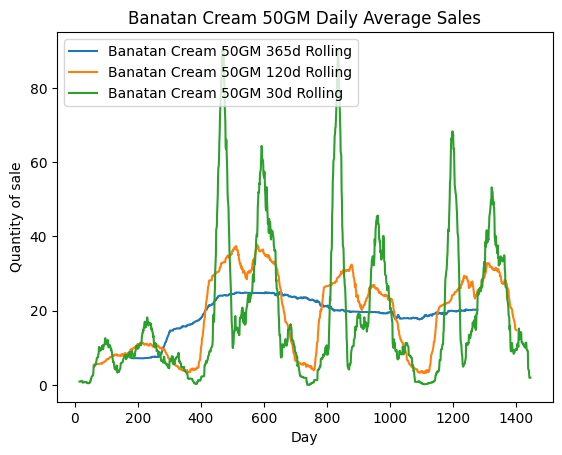

In [54]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1



A365rolling = data_daily['Banatan Cream 50GM'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Banatan Cream 50GM'].rolling(120, center=True).mean()
A30rolling = data_daily['Banatan Cream 50GM'].rolling(30, center=True).mean()




plt.title('Banatan Cream 50GM Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Banatan Cream 50GM 365d Rolling', 'Banatan Cream 50GM 120d Rolling', 'Banatan Cream 50GM 30d Rolling'], loc='upper left')



# Apply Linear Regression for Forecasting
data_daily['Banatan_Cream_50GM_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Banatan_Cream_50GM_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Banatan_Cream_50GM_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.01
Test set score: 0.00


LinearRegression()

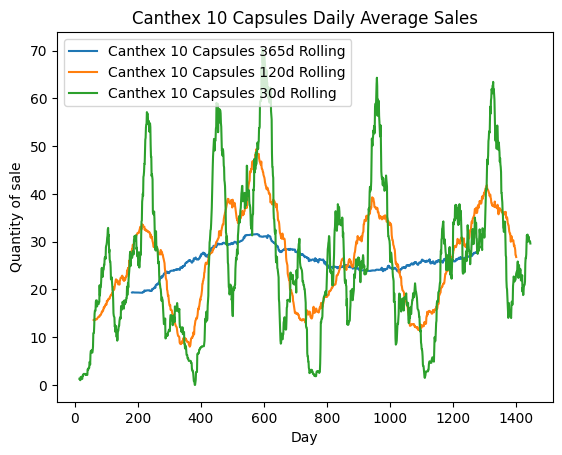

In [55]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1



A365rolling = data_daily['Canthex 10 Capsules'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Canthex 10 Capsules'].rolling(120, center=True).mean()
A30rolling = data_daily['Canthex 10 Capsules'].rolling(30, center=True).mean()




plt.title('Canthex 10 Capsules Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Canthex 10 Capsules 365d Rolling', 'Canthex 10 Capsules 120d Rolling', 'Canthex 10 Capsules 30d Rolling'], loc='upper left')



# Apply Linear Regression for Forecasting
data_daily['Canthex_10_Capsules_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Canthex_10_Capsules_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Canthex_10_Capsules_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.25
Test set score: 0.09


LinearRegression()

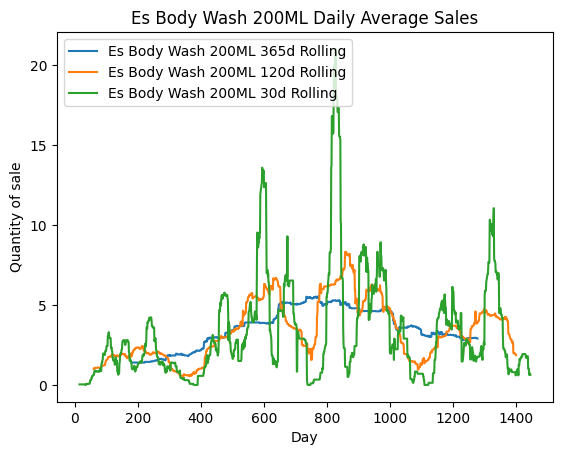

In [42]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1



N02BE_365rolling = data_daily['Es Body Wash 200ML'].rolling(window=365, center=True).mean()
N02BE_120rolling = data_daily['Es Body Wash 200ML'].rolling(120, center=True).mean()
N02BE_30rolling = data_daily['Es Body Wash 200ML'].rolling(30, center=True).mean()




plt.title('Es Body Wash 200ML Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


N02BE_365rolling.plot()
N02BE_120rolling.plot()
N02BE_30rolling.plot()

plt.legend([ 'Es Body Wash 200ML 365d Rolling', 'Es Body Wash 200ML 120d Rolling', 'Es Body Wash 200ML 30d Rolling'], loc='upper left')



# Apply Linear Regression for Forecasting
data_daily['Es_Body_Wash_200ML_365rolling'] = N02BE_365rolling.values
data_daily.dropna(subset=['Es_Body_Wash_200ML_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Es_Body_Wash_200ML_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.29
Test set score: 0.25


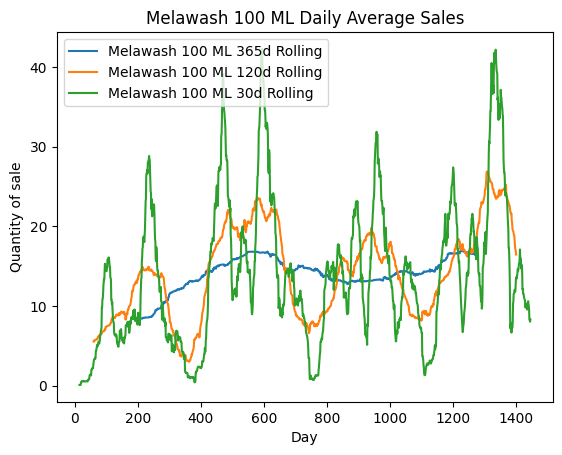

In [56]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


A365rolling = data_daily['Melawash 100 ML'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Melawash 100 ML'].rolling(120, center=True).mean()
A30rolling = data_daily['Melawash 100 ML'].rolling(30, center=True).mean()




plt.title('Melawash 100 ML Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Melawash 100 ML 365d Rolling', 'Melawash 100 ML 120d Rolling', 'Melawash 100 ML 30d Rolling'], loc='upper left')

# Apply Linear Regression for Forecasting
data_daily['Melawash_100_ML_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Melawash_100_ML_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Melawash_100_ML_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lin_regression_r06 = create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.10
Test set score: 0.09


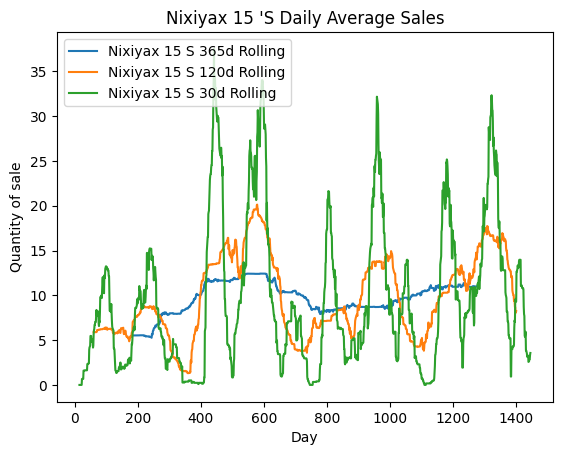

In [57]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


A365rolling = data_daily["Nixiyax 15 'S"].rolling(window=365, center=True).mean()
A120rolling = data_daily["Nixiyax 15 'S"].rolling(120, center=True).mean()
A30rolling = data_daily["Nixiyax 15 'S"].rolling(30, center=True).mean()




plt.title("Nixiyax 15 'S Daily Average Sales")
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Nixiyax 15 S 365d Rolling', 'Nixiyax 15 S 120d Rolling', 'Nixiyax 15 S 30d Rolling'], loc='upper left')

# Apply Linear Regression for Forecasting
data_daily['Nixiyax_15_S_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Nixiyax_15_S_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Nixiyax_15_S_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lin_regression_r06 = create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.88
Test set score: 0.86


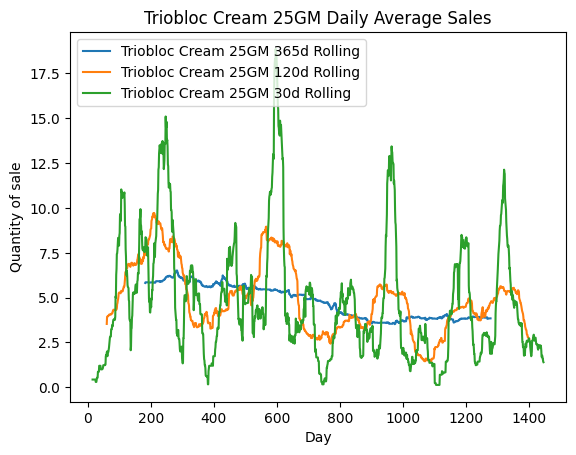

In [58]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


A365rolling = data_daily['Triobloc Cream 25GM'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Triobloc Cream 25GM'].rolling(120, center=True).mean()
A30rolling = data_daily['Triobloc Cream 25GM'].rolling(30, center=True).mean()




plt.title('Triobloc Cream 25GM Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Triobloc Cream 25GM 365d Rolling', 'Triobloc Cream 25GM 120d Rolling', 'Triobloc Cream 25GM 30d Rolling'], loc='upper left')

# Apply Linear Regression for Forecasting
data_daily['Triobloc_Cream_25GM_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Triobloc_Cream_25GM_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Triobloc_Cream_25GM_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lin_regression_r06 = create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.16
Test set score: 0.20


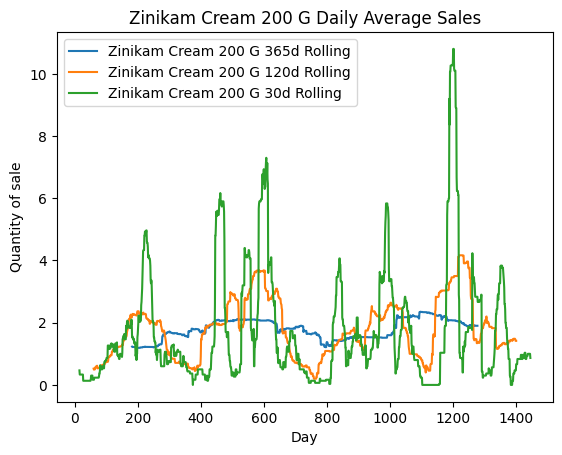

In [59]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in data_daily.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


A365rolling = data_daily['Zinikam Cream 200 G'].rolling(window=365, center=True).mean()
A120rolling = data_daily['Zinikam Cream 200 G'].rolling(120, center=True).mean()
A30rolling = data_daily['Zinikam Cream 200 G'].rolling(30, center=True).mean()




plt.title('Zinikam Cream 200 G Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


A365rolling.plot()
A120rolling.plot()
A30rolling.plot()

plt.legend([ 'Zinikam Cream 200 G 365d Rolling', 'Zinikam Cream 200 G 120d Rolling', 'Zinikam Cream 200 G 30d Rolling'], loc='upper left')

# Apply Linear Regression for Forecasting
data_daily['Zinikam_Cream_200_G_365rolling'] = A365rolling.values
data_daily.dropna(subset=['Zinikam_Cream_200_G_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['Zinikam_Cream_200_G_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lin_regression_r06 = create_linear_regression(X_train, X_test, y_train, y_test)

In [63]:
X = data_daily['datumNumber'].values.reshape(-1, 1)

In [65]:
len(X)

1097

In [66]:
y = data_daily['Zinikam_Cream_200_G_365rolling'].values.reshape(-1, 1)

In [67]:
y

array([[1.23013699],
       [1.21917808],
       [1.21917808],
       ...,
       [1.90136986],
       [1.90136986],
       [1.90136986]])

In [68]:
len(y)

1097